### Problem Statement: Build a naive Bayes model on the data set for classifying the ham and spam

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load dataset

In [2]:
ham_spam = pd.read_csv('sms_raw_NB.csv', encoding = 'ISO-8859-1')

#### EDA on dataset

In [3]:
# Check for first 5 records
ham_spam.head(5)

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


In [4]:
# Check for last 5 records
ham_spam.tail(5)

,type,text
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."
5558,ham,Shall call now dear having food


In [5]:
# Get central tendency, dispersion and shape of dataset’s distribution
ham_spam.describe()

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [6]:
ham_spam['length'] = ham_spam['text'].apply(len)

In [7]:
ham_spam.head(5)

,type,text,length
0,ham,Hope you are having a good week. Just checking in,49
1,ham,K..give back my thanks.,23
2,ham,Am also doing in cbe only. But have to pay.,43
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",150
4,spam,okmail: Dear Dave this is your final notice to...,161


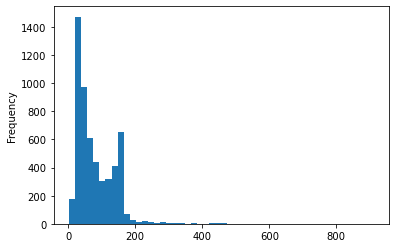

In [8]:
ham_spam['length'].plot(bins = 50, kind = 'hist')

In [9]:
ham_spam.length.describe()

count    5559.000000
mean       79.893326
std        59.200791
min         2.000000
25%        35.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [10]:
ham_spam

,type,text,length
0,ham,Hope you are having a good week. Just checking in,49
1,ham,K..give back my thanks.,23
2,ham,Am also doing in cbe only. But have to pay.,43
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",150
4,spam,okmail: Dear Dave this is your final notice to...,161
...,...,...,...
5554,ham,You are a great role model. You are giving so ...,245
5555,ham,"Awesome, I remember the last time we got someb...",88
5556,spam,"If you don't, your prize will go to another cu...",145
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn...",154


In [11]:
print(ham_spam[ham_spam.length == ham_spam.length.max()])

    type                                               text  length
312  ham  For me the love should start with attraction.i...     910


#### Remove punctuations and stop words

In [12]:
import string
from nltk.corpus import stopwords

In [13]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [14]:
ham_spam['text'].head(5).apply(text_process)

0                         [Hope, good, week, checking]
1                                [Kgive, back, thanks]
2                                     [also, cbe, pay]
3    [complimentary, 4, STAR, Ibiza, Holiday, å£100...
4    [okmail, Dear, Dave, final, notice, collect, 4...
Name: text, dtype: object

In [15]:
ham_spam.head()

,type,text,length
0,ham,Hope you are having a good week. Just checking in,49
1,ham,K..give back my thanks.,23
2,ham,Am also doing in cbe only. But have to pay.,43
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",150
4,spam,okmail: Dear Dave this is your final notice to...,161


#### Covert vector into string

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(ham_spam['text'])

In [18]:
print(len(bow_transformer.vocabulary_))

11356


In [19]:
msg = exm_txt = ham_spam['text'][3]

In [20]:
bow = bow_transformer.transform([msg])

In [21]:
print(bow)
print(bow.shape)

  (0, 262)	1
  (0, 605)	1
  (0, 1296)	1
  (0, 2244)	1
  (0, 2329)	1
  (0, 2588)	1
  (0, 3523)	1
  (0, 4066)	1
  (0, 5331)	1
  (0, 5554)	1
  (0, 5601)	1
  (0, 7847)	1
  (0, 8343)	1
  (0, 11304)	1
(1, 11356)


In [22]:
bow_transformer.get_feature_names()[4073]

'USED'

In [23]:
ham_spam_bow = bow_transformer.transform(ham_spam['text'])

In [24]:
print('Shape of Sparse Matrix: ', ham_spam_bow.shape)
print('Amount of non-zero occurences:', ham_spam_bow.nnz)

Shape of Sparse Matrix:  (5559, 11356)
Amount of non-zero occurences: 50014


In [25]:
sparsity =(100.0 * ham_spam_bow.nnz/(ham_spam_bow.shape[0]*ham_spam_bow.shape[1]))
print('sparsity:{}'.format(round(sparsity)))

sparsity:0


In [26]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(ham_spam_bow)
tfidf = tfidf_transformer.transform(bow)
print(tfidf)

  (0, 11304)	0.2886588513405475
  (0, 8343)	0.26016042466750977
  (0, 7847)	0.26016042466750977
  (0, 5601)	0.26016042466750977
  (0, 5554)	0.2332211897066975
  (0, 5331)	0.20699668006135605
  (0, 4066)	0.2169360073935419
  (0, 3523)	0.32915177840434773
  (0, 2588)	0.2780553934168467
  (0, 2329)	0.2953789049732685
  (0, 2244)	0.24076955349243523
  (0, 1296)	0.32915177840434773
  (0, 605)	0.147541827236046
  (0, 262)	0.32915177840434773


In [27]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.067996495433963
8.524741098576518


In [28]:
ham_spam_tfidf = tfidf_transformer.transform(ham_spam_bow)
print(ham_spam_tfidf.shape)

(5559, 11356)


In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
spam_detect_model = MultinomialNB().fit(ham_spam_tfidf, ham_spam['type'])

In [31]:
print('predicted:', spam_detect_model.predict(tfidf)[0])
print('expected:', ham_spam.type[3])

predicted: spam
expected: spam


In [32]:
all_predictions = spam_detect_model.predict(ham_spam_tfidf)
print(all_predictions)

['ham' 'ham' 'ham' ... 'spam' 'spam' 'ham']


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [34]:
print(classification_report(ham_spam['type'], all_predictions))
print(confusion_matrix(ham_spam['type'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4812
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5559
   macro avg       0.99      0.92      0.95      5559
weighted avg       0.98      0.98      0.98      5559

[[4812    0]
 [ 115  632]]


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
text_train, text_test, type_train, type_test = train_test_split(ham_spam['text'], ham_spam['type'], test_size = 0.2)

In [37]:
print(len(text_train), len(text_test), len(type_train), len(type_test))

4447 1112 4447 1112


In [38]:
from sklearn.pipeline import Pipeline

In [39]:
pipeline = Pipeline([
   ( 'bow', CountVectorizer(analyzer = text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

In [40]:
pipeline.fit(text_train, type_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001F638DC1828>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [41]:
predictions = pipeline.predict(text_test)

In [42]:
print(classification_report(predictions, type_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1015
        spam       0.68      1.00      0.81        97

    accuracy                           0.96      1112
   macro avg       0.84      0.98      0.89      1112
weighted avg       0.97      0.96      0.96      1112



In [43]:
# Accuracy score
Conf_Mat_txt = confusion_matrix(type_test, predictions)
Conf_Mat_txt

array([[969,   0],
       [ 46,  97]], dtype=int64)

In [44]:
acc_txt = accuracy_score(type_test, predictions)*100
print("Accuracy of MultinomialNB = " +str(round(acc_txt, 2)) + "%")

Accuracy of MultinomialNB = 95.86%
